## Precision Recall Curve and ROC AUC Metrics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split

def income_model_data_prep(data):
    data = pd.get_dummies(
        income.assign(
                target = np.where(data["SalStat"]==" less than or equal to 50,000", 0,1),
                nativecountry = data["nativecountry"].str.replace(" Holand-Netherlands",
                                                         " Germany"),
                JobType = data["JobType"].replace({" Never-worked":" Without-pay"}),
                occupation = data["occupation"].str.replace(" Armed-Forces"," ?")
                ).drop("SalStat",axis=1),
        drop_first=True
    )
    X = data.drop(columns=["target"],axis=1)
    y = data["target"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

    return X_train, X_test, y_train, y_test

In [3]:
## Split train and test datasets

income = pd.read_csv("../Data/income.csv")

X_train, X_test, y_train, y_test = income_model_data_prep(income)

In [15]:
## fit the classification model using Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=5000)
lr = logreg.fit(X_train, y_train)

/opt/anaconda3/envs/jupyterlab-debugger/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
## generate the confusion matrix for the model

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, lr.predict(X_test))

array([[4530,  322],
       [ 597,  947]])

In [17]:
## generate accuracy, precision, recall and F1 score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy: ", accuracy_score(y_test, lr.predict(X_test)))
print("Precision: ", precision_score(y_test, lr.predict(X_test)))
print("Recall: ", recall_score(y_test, lr.predict(X_test)))
print("F1 Score: ", f1_score(y_test, lr.predict(X_test)))

Accuracy:  0.8563164477798624
Precision:  0.7462568951930654
Recall:  0.6133419689119171
F1 Score:  0.6733025239957341


In [18]:
## generate the precision recall curve
from sklearn.metrics import precision_recall_curve

# precision_recall_curve(y_train, lr.predict_proba(X_train)[:,1])
p_curve, r_curve, t_curve = precision_recall_curve(y_train, lr.predict_proba(X_train)[:,1])

In [19]:
df = pd.DataFrame(
    {"Threshold": t_curve,
    "precision": p_curve[:-1],
    "recall": r_curve[:-1]
    }
)

df

,Threshold,precision,recall
0,0.000071,0.240442,1.000000
1,0.000097,0.240452,1.000000
2,0.000100,0.240461,1.000000
3,0.000105,0.240471,1.000000
4,0.000110,0.240480,1.000000
...,...,...,...
22681,1.000000,1.000000,0.002439
22682,1.000000,1.000000,0.001788
22683,1.000000,1.000000,0.001301
22684,1.000000,1.000000,0.000813


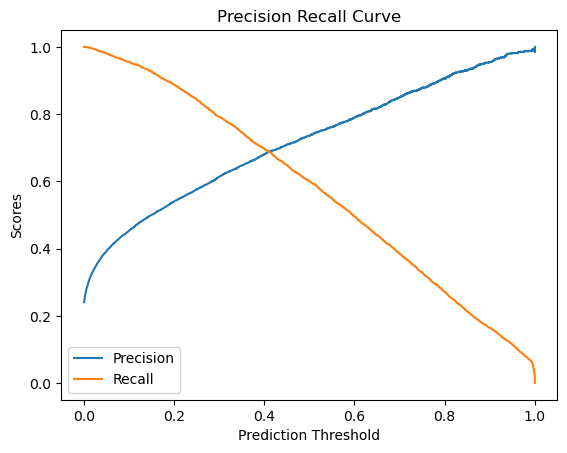

In [20]:
plt.plot(t_curve, p_curve[:-1], label="Precision")
plt.plot(t_curve, r_curve[:-1], label="Recall")
plt.title("Precision Recall Curve")
plt.xlabel("Prediction Threshold")
plt.ylabel("Scores")
plt.legend()
plt.show();


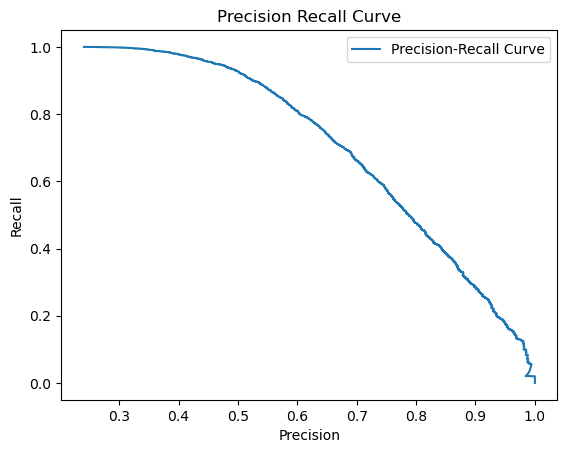

In [21]:
## Alternate view

plt.plot(p_curve, r_curve,label="Precision-Recall Curve")
plt.title("Precision Recall Curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend()
plt.show();


Optimum Threshold: 0.33 with F1 score 0.6944628281491286


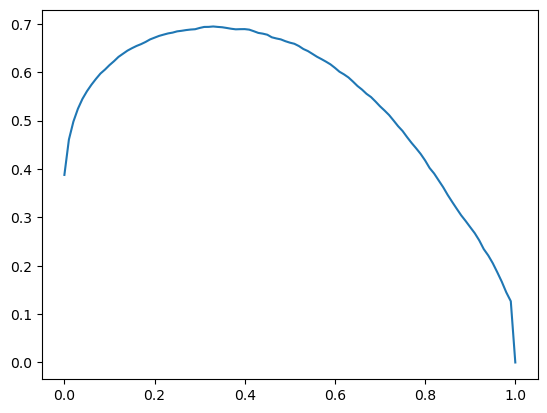

In [32]:
## Plot F1 curve
f1 = []

thresholds = np.linspace(0, 1, 101)

for thresh in thresholds:
    y_pred = (lr.predict_proba(X_train)[:,1]>thresh)
    f1.append(f1_score(y_train, y_pred))

sns.lineplot(x=thresholds, y=f1);

# f1 = np.array(f1)

# max_index = np.argmax(f1)

thresh = thresholds[f1.index(max(f1))]

print(f'Optimum Threshold: {thresh} with F1 score {max(f1)}')


In [23]:
print("Accuracy: ", accuracy_score(y_test, (lr.predict_proba(X_test)[:,-1]>0.4)))
print("Precision: ", precision_score(y_test, (lr.predict_proba(X_test)[:,-1]>0.4)))
print("Recall: ", recall_score(y_test, (lr.predict_proba(X_test)[:,-1]>0.4)))
print("F1 Score: ", f1_score(y_test, (lr.predict_proba(X_test)[:,-1]>0.4)))

Accuracy:  0.850375234521576
Precision:  0.684940138626339
Recall:  0.7040155440414507
F1 Score:  0.6943468540402428


In [24]:
confusion_matrix(y_test,(lr.predict_proba(X_test)[:,-1]>0.4))

array([[4352,  500],
       [ 457, 1087]])

In [26]:
from sklearn.metrics import roc_curve, auc

#Predicted probabilities of positive class
y_probs = lr.predict_proba(X_train)[:,1]

roc_curve(y_train, y_probs)


(array([0.        , 0.        , 0.        , ..., 0.99830168, 0.99840461,
        1.        ], shape=(7031,)),
 array([0.00000000e+00, 3.25150382e-04, 1.78832710e-03, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00], shape=(7031,)),
 array([           inf, 1.00000000e+00, 1.00000000e+00, ...,
        2.26251459e-04, 2.25683080e-04, 7.10149340e-05], shape=(7031,)))

In [27]:
#Calculate the roc curve

fpr, tpr, thresholds = roc_curve(y_train, y_probs)

In [33]:

"""Calculate AUC (Area Under Curve) -- 
calculates the model performance in distinguishing 
actual negative classes from positive ones"""

auc_score = auc(fpr, tpr)

In [30]:
auc_score

np.float64(0.9075757194307791)

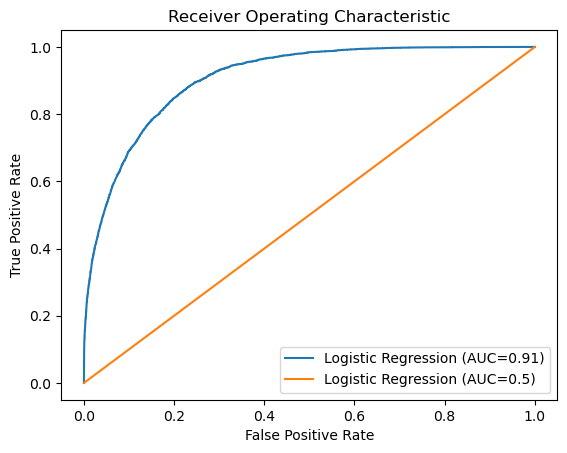

In [38]:
#Plot the ROC curve
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC={auc_score:.2f})')

#Plot the Random Guess curve
plt.plot([0,1], [0,1], label=f'Logistic Regression (AUC=0.5)')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend()
plt.show();